In [27]:
pip install ucimlrepo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
from ucimlrepo import fetch_ucirepo
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import pandas as pd

# Fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# Data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# Get feature names from metadata
feature_names = predict_students_dropout_and_academic_success.metadata.features

# Create dataframe for X and y
df = pd.DataFrame(data=X, columns=feature_names)
df['Target'] = y  # Adding the target variable to the dataframe

display(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0000,1,19,12,...,0,0,0,0,0.0000,0,10.8000,1.4000,1.7400,Dropout
1,1,15,1,9254,1,1,160.0000,1,1,3,...,0,6,6,6,13.6667,0,13.9000,-0.3000,0.7900,Graduate
2,1,1,5,9070,1,1,122.0000,1,37,37,...,0,6,0,0,0.0000,0,10.8000,1.4000,1.7400,Dropout
3,1,17,2,9773,1,1,122.0000,1,38,37,...,0,6,10,5,12.4000,0,9.4000,-0.8000,-3.1200,Graduate
4,2,39,1,8014,0,1,100.0000,1,37,38,...,0,6,6,6,13.0000,0,13.9000,-0.3000,0.7900,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0000,1,1,1,...,0,6,8,5,12.6667,0,15.5000,2.8000,-4.0600,Graduate
4420,1,1,2,9773,1,1,120.0000,105,1,1,...,0,6,6,2,11.0000,0,11.1000,0.6000,2.0200,Dropout
4421,1,1,1,9500,1,1,154.0000,1,37,37,...,0,8,9,1,13.5000,0,13.9000,-0.3000,0.7900,Dropout
4422,1,1,1,9147,1,1,180.0000,1,37,37,...,0,5,6,5,12.0000,0,9.4000,-0.8000,-3.1200,Graduate


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


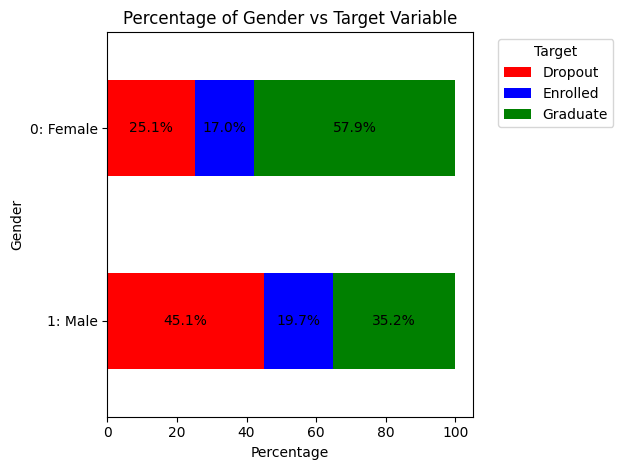

In [61]:
import matplotlib.pyplot as plt

# Function to add value labels
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        plt.text(rect.get_x() + width / 2., rect.get_y() + rect.get_height() / 2.,
                 '%.1f%%' % width, ha='center', va='center', color='black')

# Group by Gender and Target and count occurrences
gender_target_freq = df.groupby(['Gender', 'Target']).size().unstack(fill_value=0)

# Calculate total count for each gender
gender_total_count = gender_target_freq.sum(axis=1)

# Calculate percentages
gender_percentages = gender_target_freq.divide(gender_total_count, axis=0) * 100

# Plot horizontal bar chart with custom colors
ax = gender_percentages.plot(kind='barh', stacked=True, color=['red', 'blue', 'green'])

# Add value labels
for i, (index, row) in enumerate(gender_percentages.iterrows()):
    autolabel(ax.patches[i * len(row): (i + 1) * len(row)])

# Customize plot
plt.xlabel('Percentage')
plt.ylabel('Gender')
plt.title('Percentage of Gender vs Target Variable')
plt.legend(['Dropout', 'Enrolled', 'Graduate'], title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')

# Change y-axis labels
new_labels = ['0: Female', '1: Male']
plt.yticks(range(len(new_labels)), new_labels)

plt.gca().invert_yaxis()  # Invert y-axis to have Female at the top
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


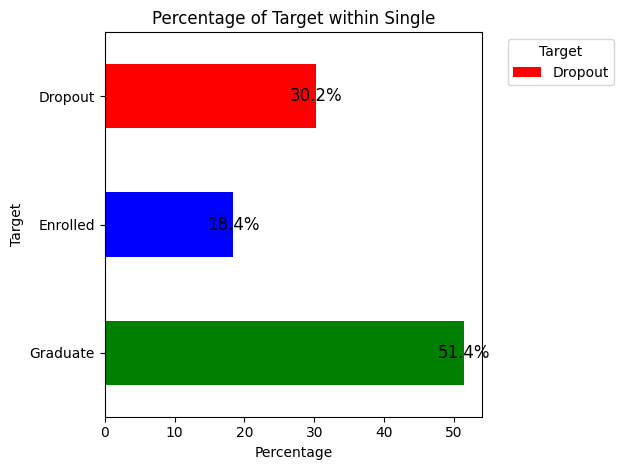

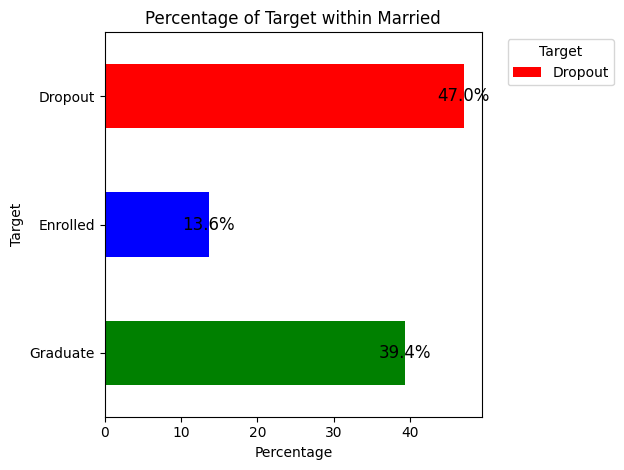

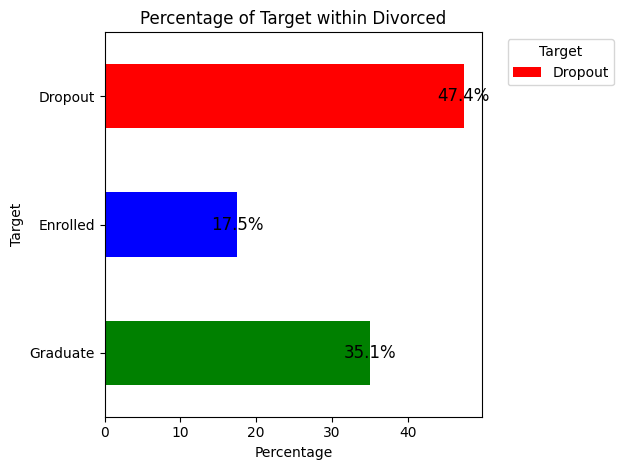

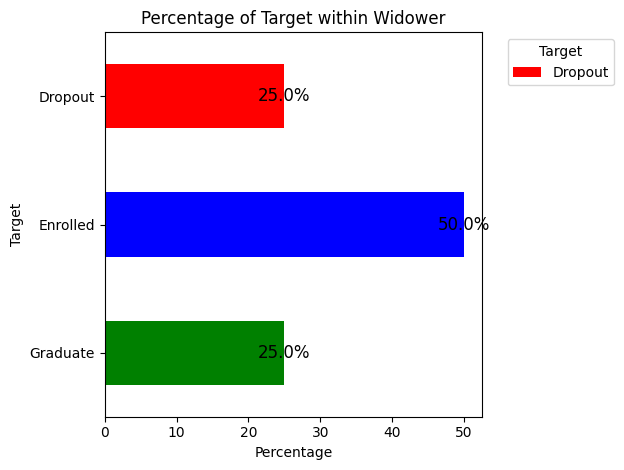

In [62]:
import matplotlib.pyplot as plt

# Define function to create new marital category
def create_marital_category(status):
    if status in [1]:
        return "Single"
    elif status in [2, 5]:
        return "Married"
    elif status == 3:
        return "Widower"
    elif status in [4, 6]:
        return "Divorced"

# Apply function to create new category column
df['Marital_Category'] = df['Marital Status'].apply(create_marital_category)

# Get unique marital categories
unique_marital_categories = df['Marital_Category'].unique()

# Define colors for each target
colors = {'Dropout': 'red', 'Enrolled': 'blue', 'Graduate': 'green'}

# Function to add value labels
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        plt.text(width, rect.get_y() + rect.get_height() / 2.,
                 '%.1f%%' % width, ha='center', va='center', color='black', fontsize=12)

# Plot horizontal bar graph for each marital category
for category in unique_marital_categories:
    marital_category_data = df[df['Marital_Category'] == category]
    marital_target_freq = marital_category_data.groupby('Target').size()

    # Calculate total count for each marital category
    marital_total_count = marital_target_freq.sum()

    # Calculate percentages
    marital_percentages = (marital_target_freq / marital_total_count) * 100

    # Plotting
    plt.figure()
    ax = marital_percentages.plot(kind='barh', color=[colors.get(target, 'gray') for target in marital_target_freq.index])

    # Add percentage labels to the bars
    autolabel(ax.patches)

    # Customize plot
    plt.xlabel('Percentage')
    plt.ylabel('Target')
    plt.title('Percentage of Target within ' + category)
    plt.legend(['Dropout', 'Enrolled', 'Graduate'], title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gca().invert_yaxis()  # Invert y-axis to have 'Single' at the top
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()




In [73]:
# Define the desired order of Marital Status categories
desired_order = ['Single', 'Married', 'Divorced', 'Widower']

# Group by Marital Status and Target and count occurrences
marital_target_freq = df.groupby(['Marital_Category', 'Target']).size().unstack(fill_value=0)

# Calculate total count for each marital category
marital_target_freq['Total'] = marital_target_freq.sum(axis=1)

# Calculate percentage for each marital category
marital_target_freq['Percentage'] = (marital_target_freq['Total'] / len(df) * 100).round(2)

# Reorder the rows based on the desired order of Marital Status categories
marital_target_freq = marital_target_freq.reindex(desired_order)

# Display the table with total count and percentage
print(marital_target_freq)



Target            Dropout  Enrolled  Graduate  Total  Percentage
Marital_Category                                                
Single               1184       720      2015   3919     88.5800
Married               190        55       159    404      9.1300
Divorced               46        17        34     97      2.1900
Widower                 1         2         1      4      0.0900


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
def course_name_mapping(status):
  if status == 33:
    return "Biofuel Production Technologies"
  elif status == 171:
    return "Animation and Multimedia Design"
  elif status == 8014:
    return "Social Service (evening attendance)"
  elif status == 9003:
    return "Agronomy"
  elif status == 9070:
    return "Communication Design"
  elif status == 9085:
    return "Veterinary Nursing"
  elif status == 9119:
    return "Informatics Engineering"
  elif status == 9130:
    return "Equiniculture"
  elif status == 9147:
    return "Management"
  elif status == 9238:
    return "Social Service"
  elif status == 9254:
    return "Tourism"
  elif status == 9500:
    return "Nursing"
  elif status == 9556:
    return "Oral Hygiene"
  elif status == 9670:
    return "Advertising and Marketing Management"
  elif status == 9773:
    return "Journalism and Communication"
  elif status == 9853:
    return "Basic Education"
  elif status == 9991:
    return "Management (evening attendance)"

# Apply function to create new category column
df['Course_Category_Name'] = df['Course'].apply(course_name_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


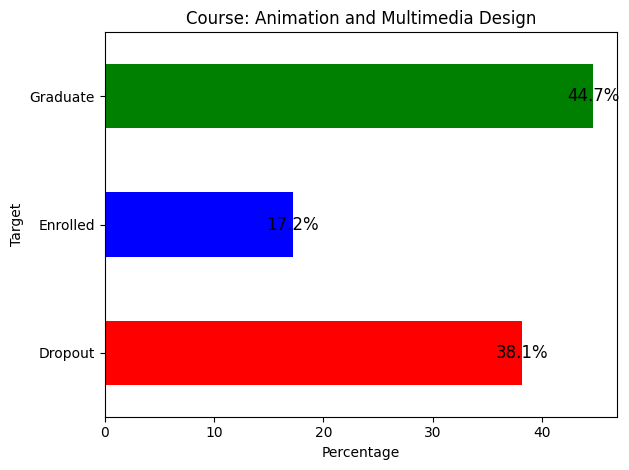

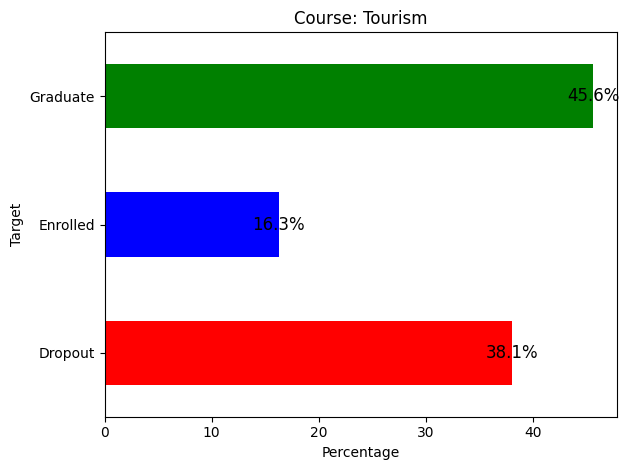

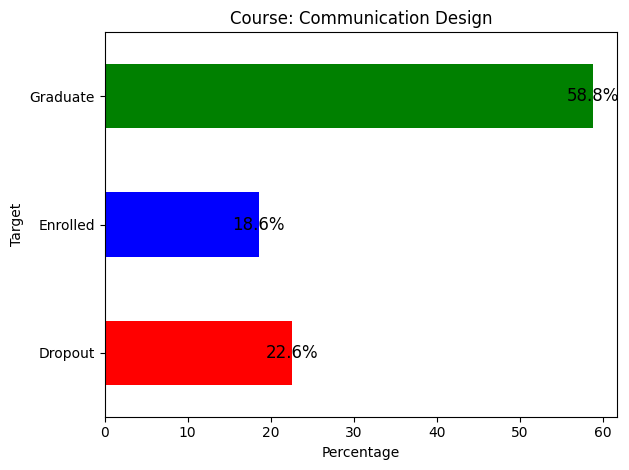

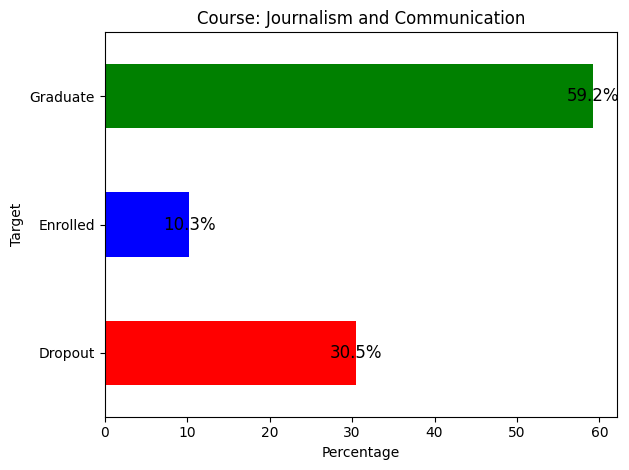

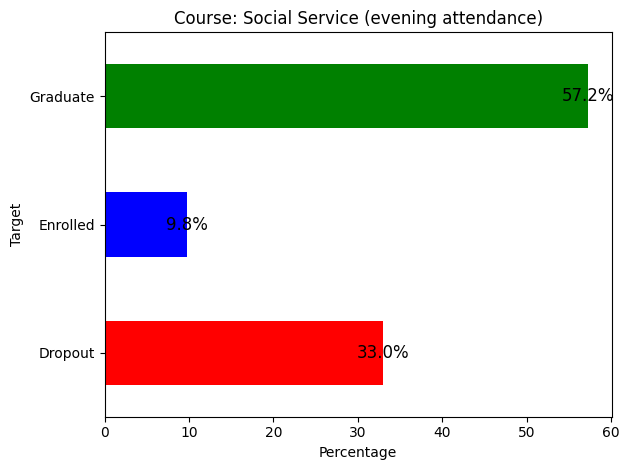

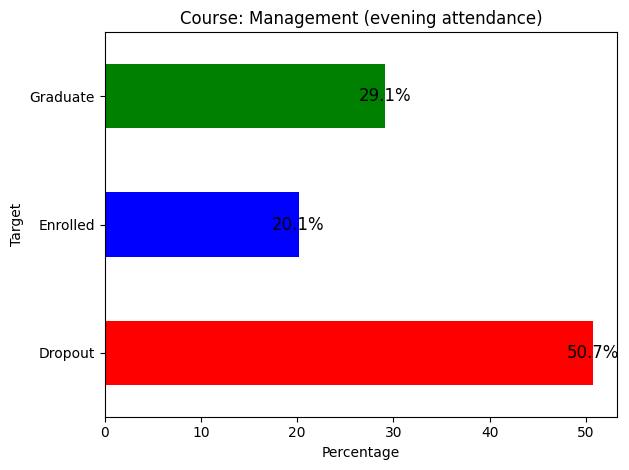

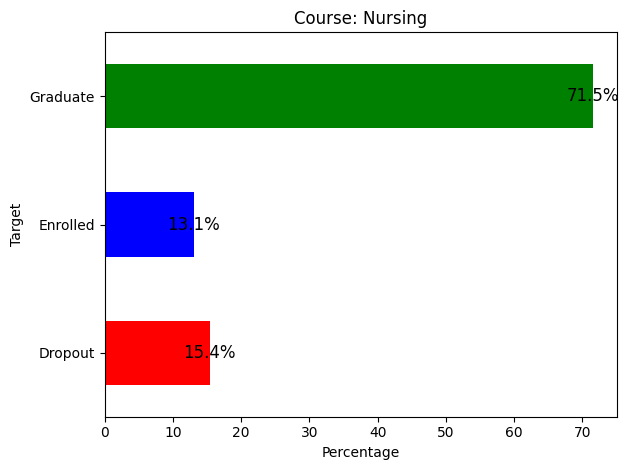

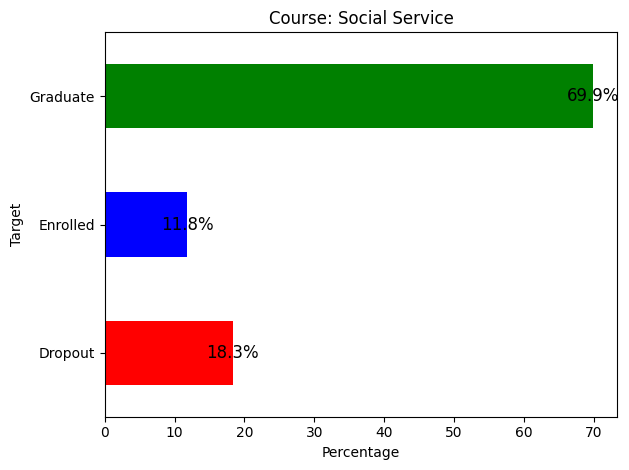

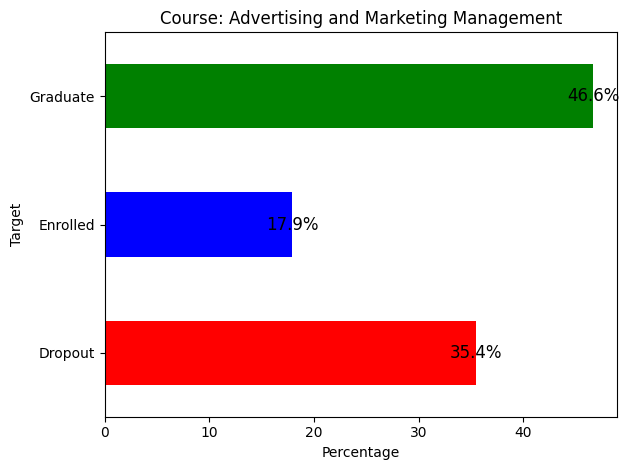

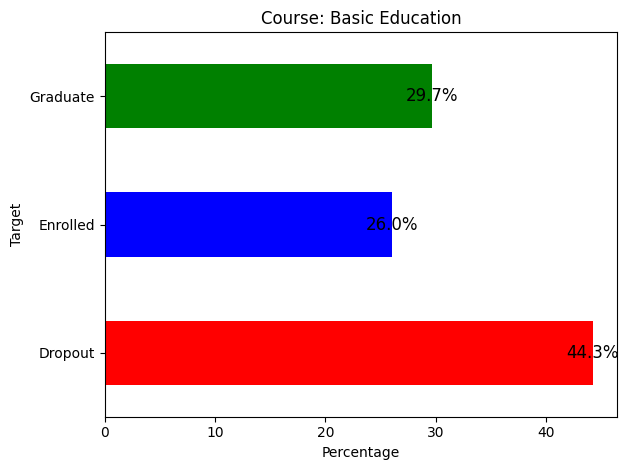

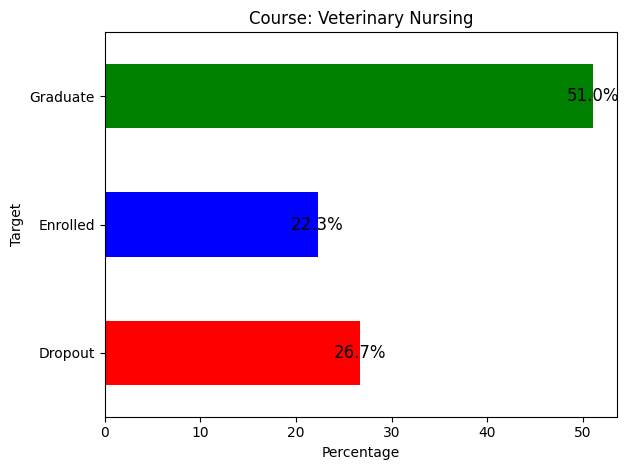

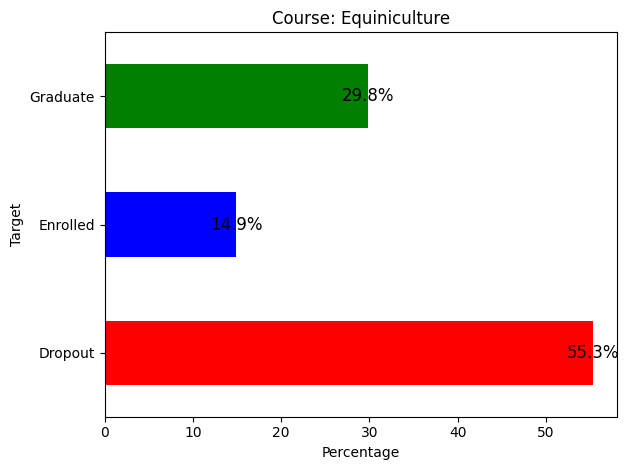

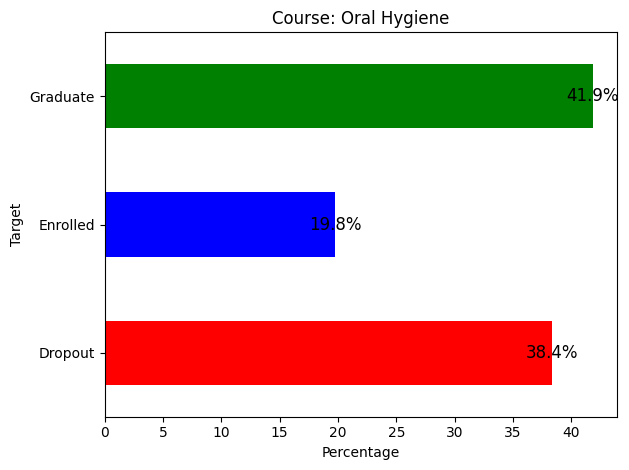

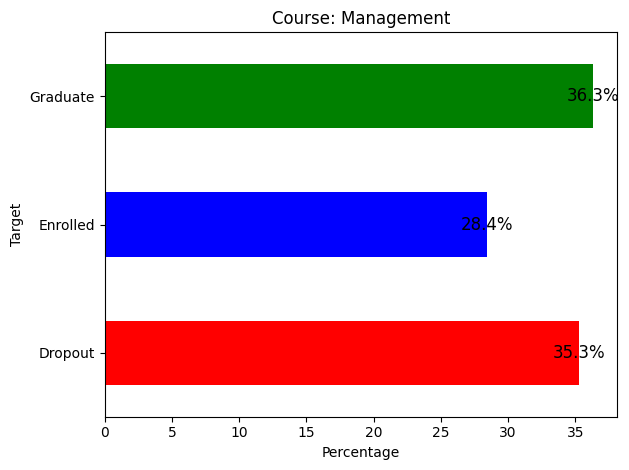

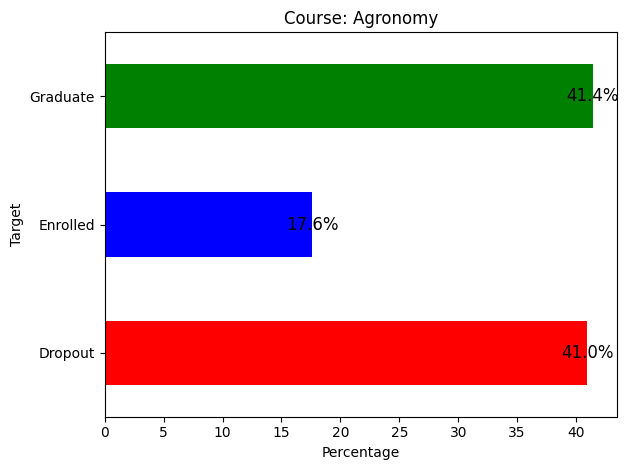

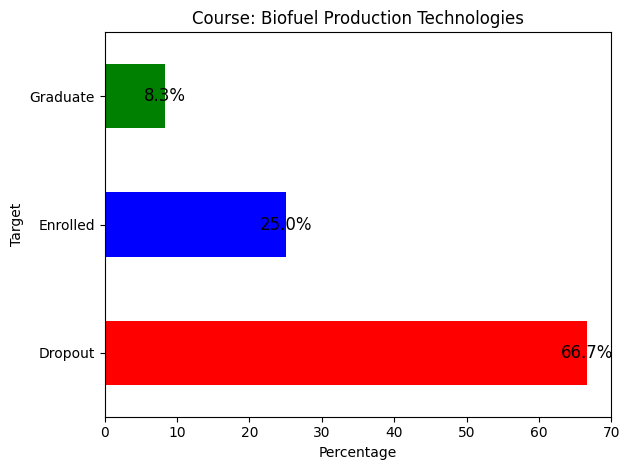

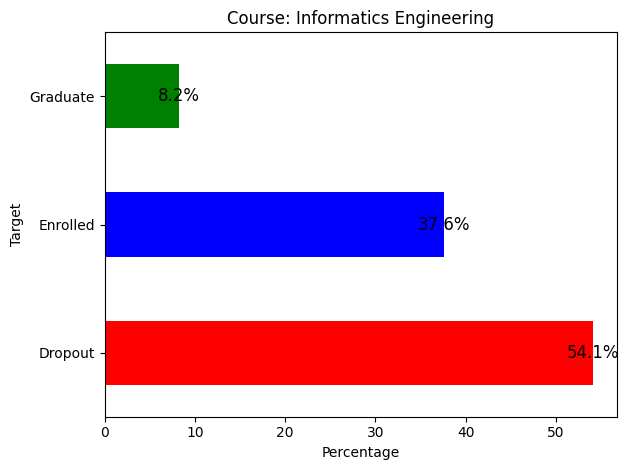

In [32]:
import matplotlib.pyplot as plt

# Get unique course categories
unique_course_categories = df['Course_Category_Name'].unique()

# Define colors for each target
colors = {'Dropout': 'red', 'Enrolled': 'blue', 'Graduate': 'green'}

# Function to add value labels
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        plt.text(width, rect.get_y() + rect.get_height() / 2.,
                 '%.1f%%' % width, ha='center', va='center', color='black', fontsize=12)

# Plot horizontal bar chart for each course category
for category in unique_course_categories:
    category_data = df[df['Course_Category_Name'] == category]
    category_target_freq = category_data.groupby('Target').size()

    if len(category_target_freq) > 0:  # Check if there is data to plot
        category_total_count = category_target_freq.sum()
        category_target_percentage = (category_target_freq / category_total_count) * 100

        ax = category_target_percentage.plot(kind='barh', color=[colors.get(target, 'gray') for target in category_target_freq.index])

        # Add percentage labels to the bars
        autolabel(ax.patches)

        plt.xlabel('Percentage')
        plt.ylabel('Target')
        plt.title('Course: ' + category)
        plt.tight_layout()
        plt.show()




In [33]:
import pandas as pd

# Initialize an empty dictionary to store dropout, enrolled, and graduate percentages for each course
course_percentages = {'Course Category': [], 'Dropout': [], 'Enrolled': [], 'Graduate': []}

# Iterate over unique course categories
for category in unique_course_categories:
    category_data = df[df['Course_Category_Name'] == category]
    category_total_count = len(category_data)
    category_target_freq = category_data.groupby('Target').size()

    # Check if there is data for all three targets
    if len(category_target_freq) == 3:
        # Add course category to dictionary
        course_percentages['Course Category'].append(category)

       # Calculate percentages and add them to dictionary with four decimal places
        dropout_percentage = round((category_target_freq.get('Dropout', 0) / category_total_count) * 100, 4)
        enrolled_percentage = round((category_target_freq.get('Enrolled', 0) / category_total_count) * 100, 4)
        graduate_percentage = round((category_target_freq.get('Graduate', 0) / category_total_count) * 100, 4)

        course_percentages['Dropout'].append(dropout_percentage)
        course_percentages['Enrolled'].append(enrolled_percentage)
        course_percentages['Graduate'].append(graduate_percentage)

# Create a DataFrame from the course percentages dictionary
course_percentages_df = pd.DataFrame(course_percentages)

# Sort the DataFrame by dropout percentage in descending order
course_percentages_df = course_percentages_df.sort_values(by='Dropout', ascending=False)


# Display the sorted course percentages table
print(course_percentages_df.to_string(index=False))




                     Course Category  Dropout  Enrolled  Graduate
     Biofuel Production Technologies  66.6667   25.0000    8.3333
                       Equiniculture  55.3191   14.8936   29.7872
             Informatics Engineering  54.1176   37.6471    8.2353
     Management (evening attendance)  50.7463   20.1493   29.1045
                     Basic Education  44.2708   26.0417   29.6875
                            Agronomy  40.9524   17.6190   41.4286
                        Oral Hygiene  38.3721   19.7674   41.8605
     Animation and Multimedia Design  38.1395   17.2093   44.6512
                             Tourism  38.0952   16.2698   45.6349
Advertising and Marketing Management  35.4478   17.9104   46.6418
                          Management  35.2632   28.4211   36.3158
 Social Service (evening attendance)  33.0233    9.7674   57.2093
        Journalism and Communication  30.5136   10.2719   59.2145
                  Veterinary Nursing  26.7062   22.2552   51.0386
          

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
import pandas as pd

# Define a function to categorize gender based on status (0 and 1)
def categorize_gender(status):
    if status == 0:
        return 'Female'
    elif status == 1:
        return 'Male'
    else:
        return 'Other'

# Apply the categorize_gender function to create a new column 'Gender_Category'
df['Gender_Category'] = df['Gender'].apply(categorize_gender)

# Initialize an empty dictionary to store dropout, enrolled, and graduate percentages for each course
course_percentages = {'Course Category': [], 'Male': [], 'Female': [], 'Dropout': [], 'Enrolled': [], 'Graduate': []}

# Iterate over unique course categories
for category in unique_course_categories:
    category_data = df[df['Course_Category_Name'] == category]
    category_total_count = len(category_data)

    # Group by target status and count occurrences
    category_target_freq = category_data.groupby('Target').size()

    # Check if there is data for all three targets
    if len(category_target_freq) == 3:
        # Add course category to dictionary
        course_percentages['Course Category'].append(category)

        # Calculate percentages for each target status
        dropout_percentage = round((category_target_freq.get('Dropout', 0) / category_total_count) * 100, 4)
        enrolled_percentage = round((category_target_freq.get('Enrolled', 0) / category_total_count) * 100, 4)
        graduate_percentage = round((category_target_freq.get('Graduate', 0) / category_total_count) * 100, 4)

        course_percentages['Dropout'].append(dropout_percentage)
        course_percentages['Enrolled'].append(enrolled_percentage)
        course_percentages['Graduate'].append(graduate_percentage)

        # Count male and female students
        male_count = len(category_data[category_data['Gender_Category'] == 'Male'])
        female_count = len(category_data[category_data['Gender_Category'] == 'Female'])
        course_percentages['Male'].append(male_count)
        course_percentages['Female'].append(female_count)

# Create a DataFrame from the course percentages dictionary
course_percentages_df = pd.DataFrame(course_percentages)

# Sort the DataFrame by dropout percentage in descending order
course_percentages_df = course_percentages_df.sort_values(by='Dropout', ascending=False)

# Display the sorted course percentages table
print(course_percentages_df.to_string(index=False))


#Save as excel file easier to put into Report

# Define the file path for the Excel file
excel_file_path = "course_percentages.xlsx"

# Save the DataFrame to an Excel file
course_percentages_df.to_excel(excel_file_path, index=False)

print(f"Excel file saved successfully at: {excel_file_path}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                     Course Category  Male  Female  Dropout  Enrolled  Graduate
     Biofuel Production Technologies     9       3  66.6667   25.0000    8.3333
                       Equiniculture    62      79  55.3191   14.8936   29.7872
             Informatics Engineering   163       7  54.1176   37.6471    8.2353
     Management (evening attendance)   136     132  50.7463   20.1493   29.1045
                     Basic Education     9     183  44.2708   26.0417   29.6875
                            Agronomy   149      61  40.9524   17.6190   41.4286
                        Oral Hygiene    19      67  38.3721   19.7674   41.8605
     Animation and Multimedia Design   117      98  38.1395   17.2093   44.6512
                             Tourism   100     152  38.0952   16.2698   45.6349
Advertising and Marketing Management   122     146  35.4478   17.9104   46.6418
                          Management   162     218  35.2632   28.4211   36.3158
 Social Service (evening attendance)    

In [92]:
import pandas as pd

# Define a function to categorize gender based on status (0 and 1)
def categorize_gender(status):
    if status == 0:
        return 'Female'
    elif status == 1:
        return 'Male'
    else:
        return 'Other'

# Apply the categorize_gender function to create a new column 'Gender_Category'
df['Gender_Category'] = df['Gender'].apply(categorize_gender)

# Initialize an empty dictionary to store course counts and percentages
course_counts = {'Course Category': [], 'Male': [], 'Female': [], 'Dropout': [], 'Enrolled': [], 'Graduate': [],
                 'Male Dropout %': [], 'Female Dropout %': [], 'Male Graduate %': [], 'Female Graduate %': []}

# Iterate over unique course categories
for category in unique_course_categories:
    category_data = df[df['Course_Category_Name'] == category]
    category_total_count = len(category_data)

    # Group by target status and gender and count occurrences
    category_target_gender_freq = category_data.groupby(['Target', 'Gender_Category']).size().unstack(fill_value=0)

    # Add course category to dictionary
    course_counts['Course Category'].append(category)

    # Calculate percentages for each target status
    dropout_percentage = round((category_target_gender_freq.loc['Dropout'].sum() / category_total_count) * 100, 4)
    enrolled_percentage = round((category_target_gender_freq.loc['Enrolled'].sum() / category_total_count) * 100, 4)
    graduate_percentage = round((category_target_gender_freq.loc['Graduate'].sum() / category_total_count) * 100, 4)

    course_counts['Dropout'].append(dropout_percentage)
    course_counts['Enrolled'].append(enrolled_percentage)
    course_counts['Graduate'].append(graduate_percentage)

    # Count male and female students
    male_count = category_target_gender_freq['Male'].sum()
    female_count = category_target_gender_freq['Female'].sum()
    course_counts['Male'].append(male_count)
    course_counts['Female'].append(female_count)

    # Calculate dropout and graduate percentages for each gender
    male_dropout_percentage = round((category_target_gender_freq['Male']['Dropout'] / male_count) * 100, 4) if male_count != 0 else 0
    female_dropout_percentage = round((category_target_gender_freq['Female']['Dropout'] / female_count) * 100, 4) if female_count != 0 else 0
    male_graduate_percentage = round((category_target_gender_freq['Male']['Graduate'] / male_count) * 100, 4) if male_count != 0 else 0
    female_graduate_percentage = round((category_target_gender_freq['Female']['Graduate'] / female_count) * 100, 4) if female_count != 0 else 0

    course_counts['Male Dropout %'].append(male_dropout_percentage)
    course_counts['Female Dropout %'].append(female_dropout_percentage)
    course_counts['Male Graduate %'].append(male_graduate_percentage)
    course_counts['Female Graduate %'].append(female_graduate_percentage)

# Create a DataFrame from the course_counts dictionary
course_counts_df = pd.DataFrame(course_counts)

# Sort the DataFrame by dropout percentage in descending order
course_counts_df = course_counts_df.sort_values(by='Dropout', ascending=False)

# Display the sorted course counts table
print(course_counts_df.to_string(index=False))

#Save as excel file easier to put into Report

# Define the file path for the Excel file
excel_file_path = "course_percentages_by_gender.xlsx"

# Save the DataFrame to an Excel file
course_counts_df.to_excel(excel_file_path, index=False)

print(f"Excel file saved successfully at: {excel_file_path}")



                     Course Category  Male  Female  Dropout  Enrolled  Graduate  Male Dropout %  Female Dropout %  Male Graduate %  Female Graduate %
     Biofuel Production Technologies     9       3  66.6667   25.0000    8.3333         77.7778           33.3333           0.0000            33.3333
                       Equiniculture    62      79  55.3191   14.8936   29.7872         64.5161           48.1013          24.1935            34.1772
             Informatics Engineering   163       7  54.1176   37.6471    8.2353         52.7607           85.7143           8.5890             0.0000
     Management (evening attendance)   136     132  50.7463   20.1493   29.1045         60.2941           40.9091          27.9412            30.3030
                     Basic Education     9     183  44.2708   26.0417   29.6875         44.4444           44.2623          22.2222            30.0546
                            Agronomy   149      61  40.9524   17.6190   41.4286         46.3087     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# seperate the ages into bins
# Define the bins for different age groups
bins = [17, 21, 24, 27, 31, 40, float('inf')]  # 40+ will include all ages above 40

# Define labels for the age groups
labels = ['17-20', '21-23', '24-26', '27-30', '31-39', '40+']

# Create a new column 'Age Group' based on the bins and labels
df['Age Group'] = pd.cut(df['Age at enrollment'], bins=bins, labels=labels, right=False)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


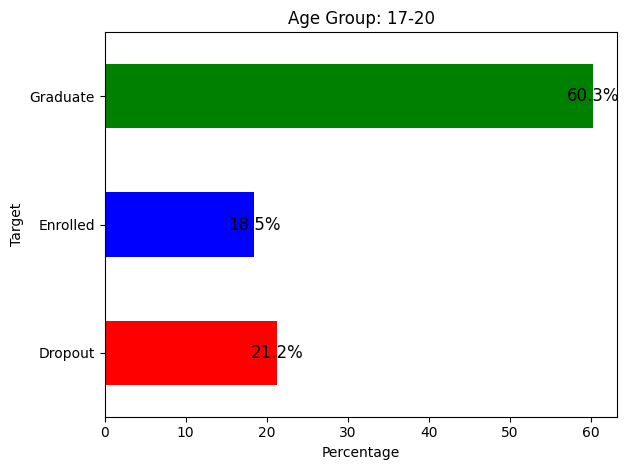

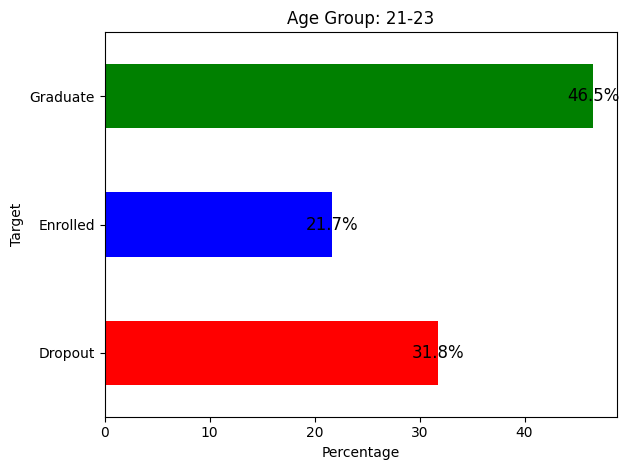

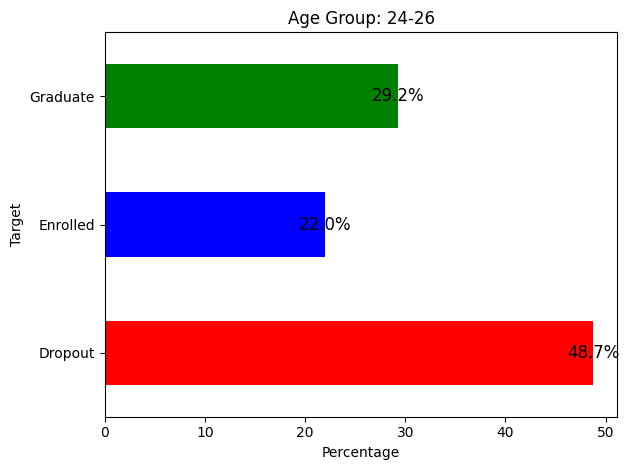

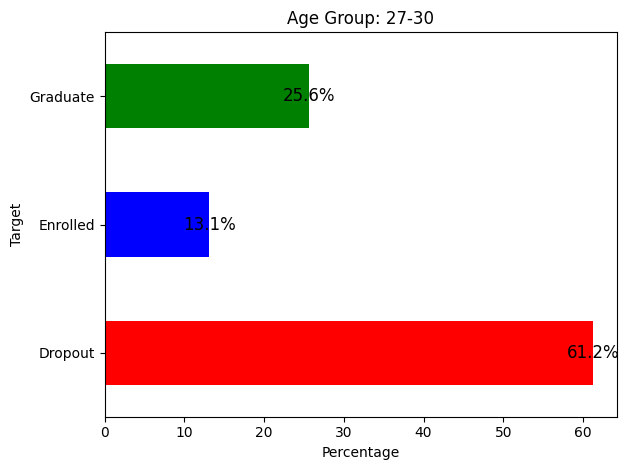

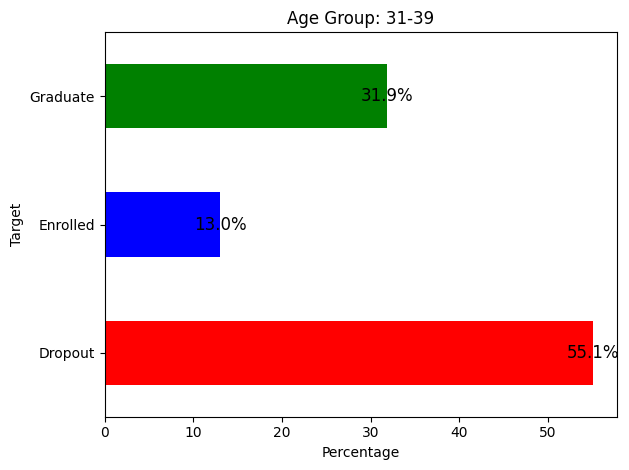

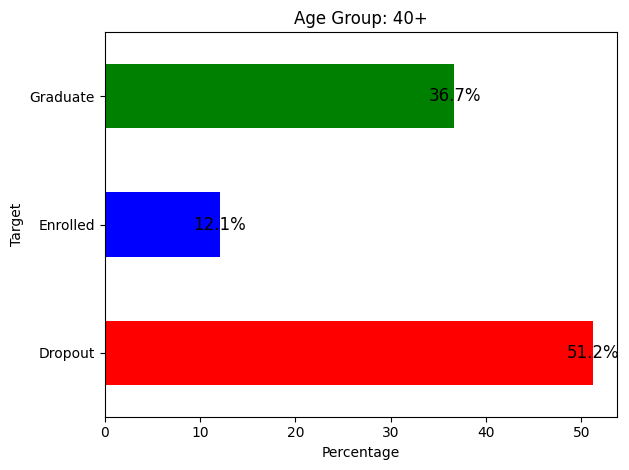

In [35]:
import matplotlib.pyplot as plt

# Define bins for different age groups
bins = [17, 21, 24, 27, 31, 40, float('inf')]  # 40+ will include all ages above 40

# Define labels for the age groups
labels = ['17-20', '21-23', '24-26', '27-30', '31-39', '40+']

# Create a new column 'Age Group' based on the bins and labels
df['Age Group'] = pd.cut(df['Age at enrollment'], bins=bins, labels=labels, right=False)

# Define colors for each target
colors = {'Dropout': 'red', 'Enrolled': 'blue', 'Graduate': 'green'}

# Function to add value labels
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        plt.text(width, rect.get_y() + rect.get_height() / 2.,
                 '%.1f%%' % width, ha='center', va='center', color='black', fontsize=12)

# Plot horizontal bar chart for each age group
for age_group in labels:
    age_group_data = df[df['Age Group'] == age_group]
    age_group_target_freq = age_group_data.groupby('Target').size()

    if len(age_group_target_freq) > 0:  # Check if there is data to plot
        age_group_total_count = age_group_target_freq.sum()
        age_group_target_percentage = (age_group_target_freq / age_group_total_count) * 100

        ax = age_group_target_percentage.plot(kind='barh', color=[colors.get(target, 'gray') for target in age_group_target_freq.index])

        # Add percentage labels to the bars
        autolabel(ax.patches)

        plt.xlabel('Percentage')
        plt.ylabel('Target')
        plt.title('Age Group: ' + age_group)
        plt.tight_layout()
        plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


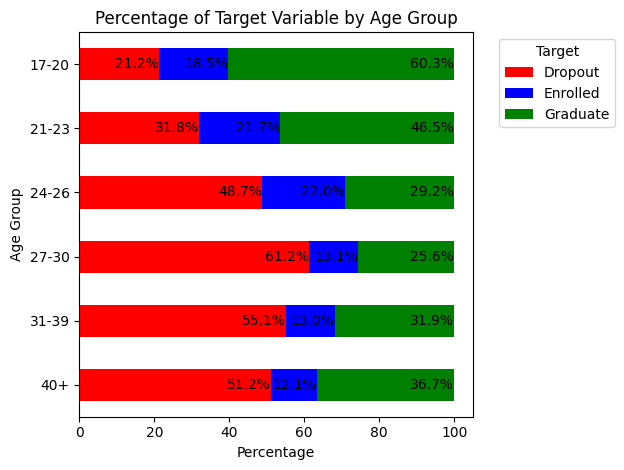

In [36]:
import matplotlib.pyplot as plt

# Group by Age Group and Target and count occurrences
age_target_freq = df.groupby(['Age Group', 'Target']).size().unstack(fill_value=0)

# Calculate total count for each age group
age_total_count = age_target_freq.sum(axis=1)

# Calculate percentages
age_percentages = age_target_freq.divide(age_total_count, axis=0) * 100

# Plot horizontal bar chart with percentages
ax = age_percentages.plot(kind='barh', stacked=True, color=['red', 'blue', 'green'])

# Function to add value labels
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        plt.text(rect.get_x() + width, rect.get_y() + rect.get_height() / 2.,
                 '%.1f%%' % rect.get_width(), ha='right', va='center', color='black', fontsize=10)

# Add percentage labels to the bars using autolabel function
for bar in ax.patches:
    autolabel([bar])

# Customize plot
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('Percentage of Target Variable by Age Group')
plt.legend(title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().invert_yaxis()  # Invert y-axis to have the youngest age group at the top

# Show plot
plt.tight_layout()
plt.show()



In [37]:
import pandas as pd

# Group by Age Group and Target and count occurrences
age_target_freq = df.groupby(['Age Group', 'Target']).size().unstack(fill_value=0)

# Calculate total count for each age group
age_target_freq['Total'] = age_target_freq.sum(axis=1)

# Display the table with total count
print(age_target_freq)


Target     Dropout  Enrolled  Graduate  Total
Age Group                                    
17-20          542       471      1538   2551
21-23          192       131       281    604
24-26          155        70        93    318
27-30          177        38        74    289
31-39          228        54       132    414
40+            127        30        91    248


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
import pandas as pd

# Group by Age Group and Target and count occurrences
age_target_freq = df.groupby(['Age Group', 'Target']).size().unstack(fill_value=0)

# Calculate total count for each age group across the entire dataset
total_counts_by_age_group = df.groupby('Age Group').size()

# Calculate percentages for each age group
age_percentages = age_target_freq.div(total_counts_by_age_group, axis=0) * 100

# Add the total count for each age group to the DataFrame
age_percentages['Total'] = total_counts_by_age_group

# Calculate total percentage for each age group
total_count_dataset = df.shape[0]
age_percentages['Total Percentage'] = (total_counts_by_age_group / total_count_dataset) * 100

# Display the table with percentages for each age group, the total count for each age group,
# and the total percentage for each age group
pd.set_option('display.float_format', lambda x: '%.4f' % x)
print(age_percentages)


#Save as excel file easier to put into Report

# Define the file path for the Excel file
excel_file_path = "age_percentages.xlsx"

# Save to an Excel file
age_percentages.to_excel(excel_file_path, index=False)

print(f"Excel file saved successfully at: {excel_file_path}")



Target     Dropout  Enrolled  Graduate  Total  Total Percentage
Age Group                                                      
17-20      21.2466   18.4633   60.2901   2551           57.6627
21-23      31.7881   21.6887   46.5232    604           13.6528
24-26      48.7421   22.0126   29.2453    318            7.1881
27-30      61.2457   13.1488   25.6055    289            6.5325
31-39      55.0725   13.0435   31.8841    414            9.3580
40+        51.2097   12.0968   36.6935    248            5.6058
Excel file saved successfully at: age_percentages.xlsx


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
def create_nationality_category(status):
    if status in [2, 6, 11, 13, 14]:
        return "Western European"
    elif status in [21, 22, 24, 25, 26]:
        return "African"
    elif status == 32:
        return "Turkish"
    elif status in [17, 62, 100, 103, 105]:
        return "Eastern European"
    elif status in [41, 101, 108, 109]:
        return "Latin American"
    elif status == 1:
        return "Portugese"

# Apply function to create new category column
df['Nationality_Category'] = df['Nacionality'].apply(create_nationality_category)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
def create_ethnicity_category(status):
    if status == 1:
        return "Portuguese"
    elif status == 2:
      return "German"
    elif status == 6:
      return "Spanish"
    elif status == 11:
      return "Italian"
    elif status == 13:
      return "Dutch"
    elif status == 14:
      return "English"
    elif status == 17:
      return "Lithuanian"
    elif status == 21:
      return "Angolan"
    elif status == 22:
      return "Cape Verdean"
    elif status == 24:
      return "Guinean"
    elif status == 25:
      return "Mozambican"
    elif status == 26:
      return "Santomean"
    elif status == 32:
      return "Turkish"
    elif status == 41:
      return "Brazilian"
    elif status == 62:
      return "Romanian"
    elif status == 100:
      return "Moldova (Republic of)"
    elif status == 101:
      return "Mexican"
    elif status == 103:
      return "Ukrainian"
    elif status == 105:
      return "Russian"
    elif status == 108:
      return "Cuban"
    elif status == 109:
      return "Colombian "
    else:
      return "Other"


# Apply function to create new category column
df['Ethnicity'] = df['Nacionality'].apply(create_ethnicity_category)

# Define custom categorical data type with desired order
ethnicity_order = [
    "Turkish",

    "Angolan", "Cape Verdean", "Guinean", "Mozambican", "Santomean",

    "Brazilian", "Colombian", "Cuban", "Mexican",

    "Lithuanian", "Moldova (Republic of)", "Romanian", "Russian", "Ukrainian",

    "Dutch", "English", "German", "Italian", "Spanish", "Portuguese", "Other"


]

ethnicity_dtype = pd.CategoricalDtype(categories=ethnicity_order, ordered=True)

# Assign custom data type to the 'Ethnicity' column
df['Ethnicity'] = df['Ethnicity'].astype(ethnicity_dtype)

# Calculate totals for each ethnicity group
ethnicity_counts = df['Ethnicity'].value_counts().sort_index()
running_total_ethnicity = ethnicity_counts.cumsum()

# Create a DataFrame to display both counts and running totals
ethnicity_counts_df = pd.DataFrame({
    'Total Count': ethnicity_counts,
    'Running Total': running_total_ethnicity
})

# Display the DataFrame
print(ethnicity_counts_df)

                       Total Count  Running Total
Ethnicity                                        
Turkish                          1              1
Angolan                          2              3
Cape Verdean                    13             16
Guinean                          5             21
Mozambican                       2             23
Santomean                       14             37
Brazilian                       38             75
Colombian                        0             75
Cuban                            1             76
Mexican                          2             78
Lithuanian                       1             79
Moldova (Republic of)            3             82
Romanian                         2             84
Russian                          2             86
Ukrainian                        3             89
Dutch                            1             90
English                          1             91
German                           2             93


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
#Count by Ethnicity
# Count the occurrences of each ethnicity group
ethnicity_counts = df['Nationality_Category'].value_counts()

# Display the counts
print(ethnicity_counts)

Nationality_Category
Portugese           4314
Latin American        42
African               36
Western European      20
Eastern European      11
Turkish                1
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


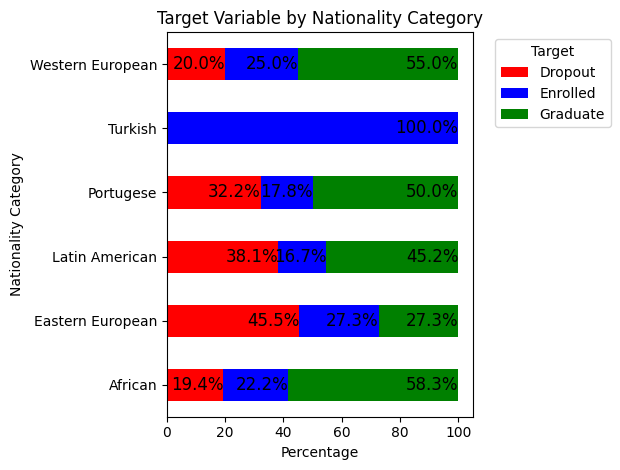

In [104]:
import matplotlib.pyplot as plt

# Group by Nationality_Category and Target and count occurrences
nationality_target_freq = df.groupby(['Nationality_Category', 'Target']).size().unstack(fill_value=0)

# Calculate total count for each nationality category
nationality_total_count = nationality_target_freq.sum(axis=1)

# Calculate percentages
nationality_target_percentage = (nationality_target_freq.div(nationality_total_count, axis=0) * 100)

# Plot horizontal bar chart with custom colors
ax = nationality_target_percentage.plot(kind='barh', stacked=True, color=['red', 'blue', 'green'])

# Function to add value labels
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        if width != 0:  # Exclude labels for 0% values
            plt.text(rect.get_x() + width, rect.get_y() + rect.get_height() / 2.,
                     '%.1f%%' % width, ha='right', va='center', color='black', fontsize=12)

# Add percentage labels to the bars using autolabel function
for bar in ax.patches:
    autolabel([bar])

# Customize plot
plt.xlabel('Percentage')
plt.ylabel('Nationality Category')
plt.title('Target Variable by Nationality Category')
plt.legend(['Dropout', 'Enrolled', 'Graduate'], title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


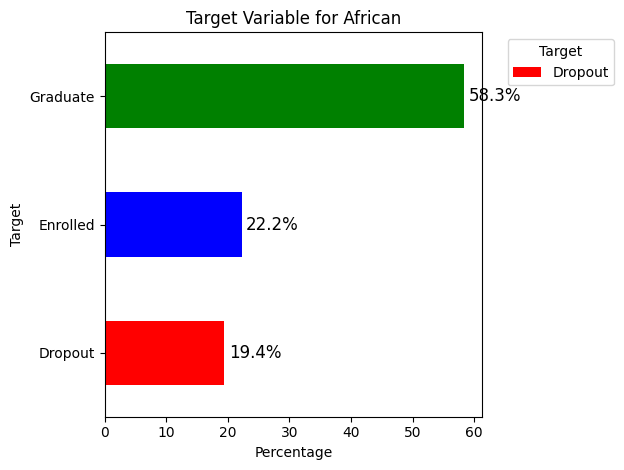

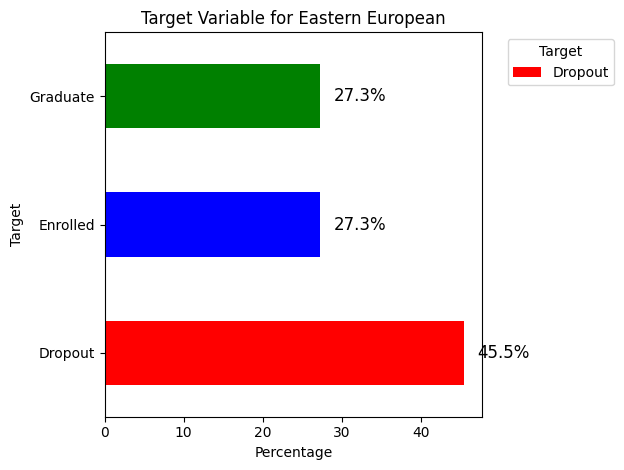

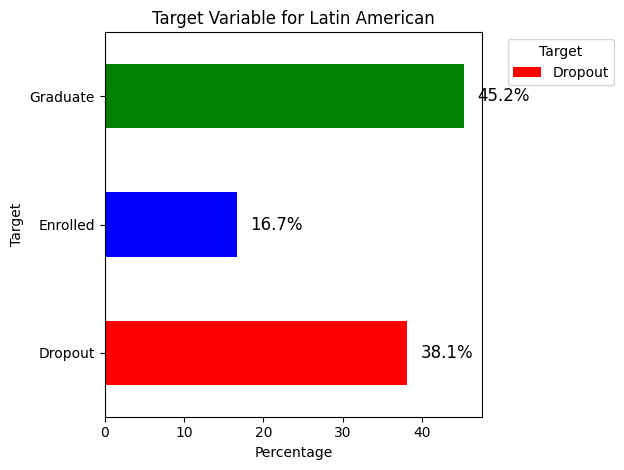

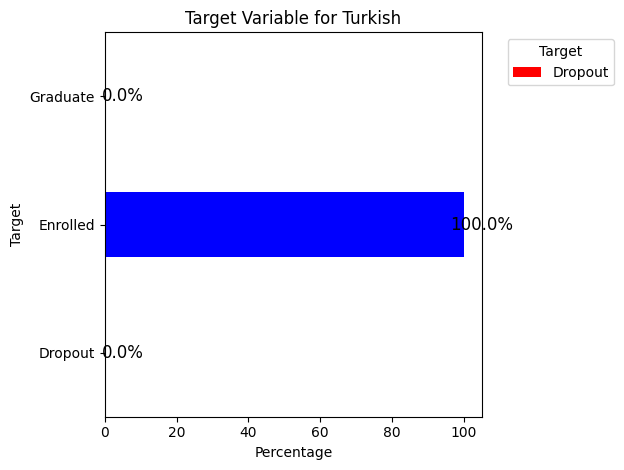

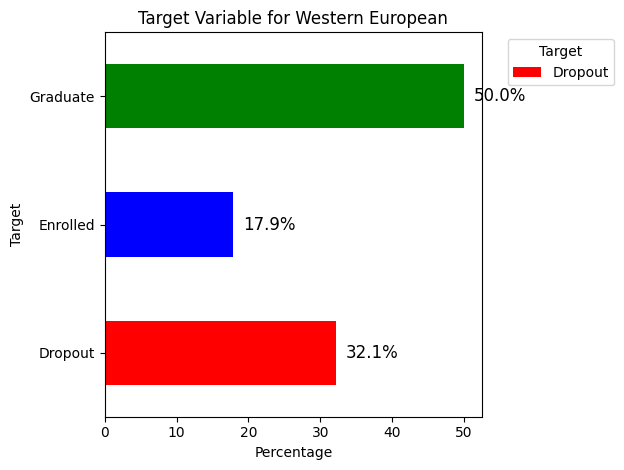

In [43]:
import matplotlib.pyplot as plt

# Group by Nationality_Category and Target and count occurrences
nationality_target_freq = df.groupby(['Nationality_Category', 'Target']).size().unstack(fill_value=0)

# Calculate total count for each nationality category
nationality_total_count = nationality_target_freq.sum(axis=1)

# Calculate percentages
nationality_target_percentage = (nationality_target_freq.div(nationality_total_count, axis=0) * 100)

# Plot horizontal bar chart for each nationality category
for nationality_category in nationality_target_percentage.index:
    ax = nationality_target_percentage.loc[nationality_category].plot(kind='barh', stacked=True, color=['red', 'blue', 'green'])

    # Add percentage labels to the bars with an offset
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 5, p.get_y() + p.get_height() / 2.,
                 '%.1f%%' % width, ha='center', va='center', color='black', fontsize=12)

    # Customize plot
    plt.xlabel('Percentage')
    plt.ylabel('Target')
    plt.title('Target Variable for ' + nationality_category)
    plt.legend(['Dropout', 'Enrolled', 'Graduate'], title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()



In [105]:
import pandas as pd

# Group by Nationality_Category and calculate percentage of International students
international_percentage = df.groupby('Nationality_Category')['International'].mean() * 100

# Display the table
print(international_percentage)


Nationality_Category
African            100.0000
Eastern European   100.0000
Latin American     100.0000
Portugese            0.0000
Turkish            100.0000
Western European   100.0000
Name: International, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


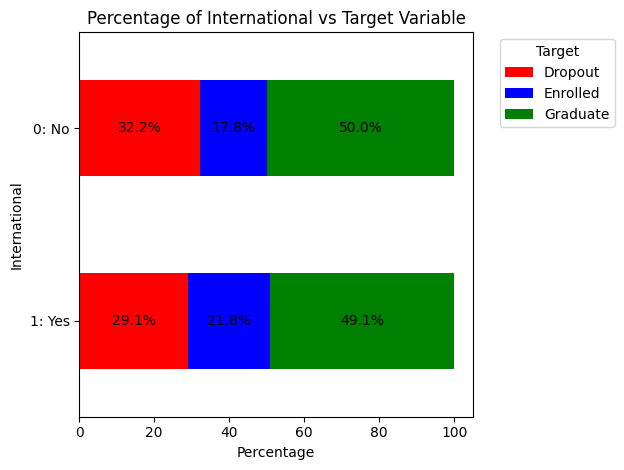

In [106]:
import matplotlib.pyplot as plt

# Function to add value labels
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        plt.text(rect.get_x() + width / 2., rect.get_y() + rect.get_height() / 2.,
                 '%.1f%%' % width, ha='center', va='center', color='black')

# Group by International Student and Target and count occurrences
International_target_freq = df.groupby(['International', 'Target']).size().unstack(fill_value=0)

# Calculate total count for each International Student
International_total_count = International_target_freq.sum(axis=1)

# Calculate percentages
International_percentages = International_target_freq.divide(International_total_count, axis=0) * 100

# Plot horizontal bar chart with custom colors
ax = International_percentages.plot(kind='barh', stacked=True, color=['red', 'blue', 'green'])

# Add value labels
for i, (index, row) in enumerate(International_percentages.iterrows()):
    autolabel(ax.patches[i * len(row): (i + 1) * len(row)])

# Customize plot
plt.xlabel('Percentage')
plt.ylabel('International')
plt.title('Percentage of International vs Target Variable')
plt.legend(['Dropout', 'Enrolled', 'Graduate'], title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')

# Change y-axis labels
new_labels = ['0: No', '1: Yes']
plt.yticks(range(len(new_labels)), new_labels)

plt.gca().invert_yaxis()  # Invert y-axis to have No at the top
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


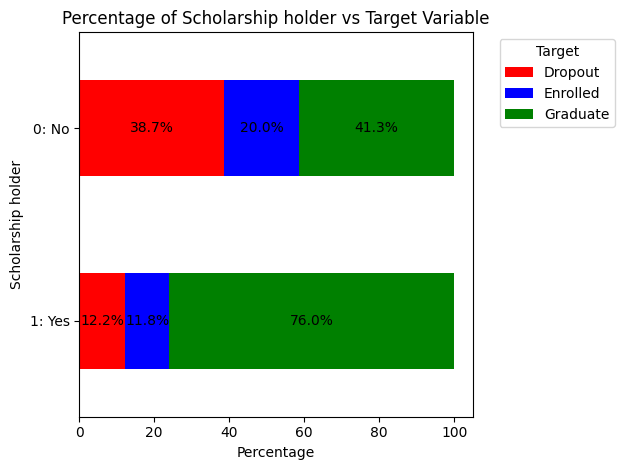

In [45]:
import matplotlib.pyplot as plt

# Function to add value labels
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        plt.text(rect.get_x() + width / 2., rect.get_y() + rect.get_height() / 2.,
                 '%.1f%%' % width, ha='center', va='center', color='black')

# Group by Scholarship holder and Target and count occurrences
Scholarship_holder_target_freq = df.groupby(['Scholarship holder', 'Target']).size().unstack(fill_value=0)

# Calculate total count for each Scholarship holder
Scholarship_holder_total_count = Scholarship_holder_target_freq.sum(axis=1)

# Calculate percentages
Scholarship_holder_percentages = Scholarship_holder_target_freq.divide(Scholarship_holder_total_count, axis=0) * 100

# Plot horizontal bar chart with custom colors
ax = Scholarship_holder_percentages.plot(kind='barh', stacked=True, color=['red', 'blue', 'green'])

# Add value labels
for i, (index, row) in enumerate(Scholarship_holder_percentages.iterrows()):
    autolabel(ax.patches[i * len(row): (i + 1) * len(row)])

# Customize plot
plt.xlabel('Percentage')
plt.ylabel('Scholarship holder')
plt.title('Percentage of Scholarship holder vs Target Variable')
plt.legend(['Dropout', 'Enrolled', 'Graduate'], title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')

# Change y-axis labels
new_labels = ['0: No', '1: Yes']
plt.yticks(range(len(new_labels)), new_labels)

plt.gca().invert_yaxis()  # Invert y-axis to have No at the top
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


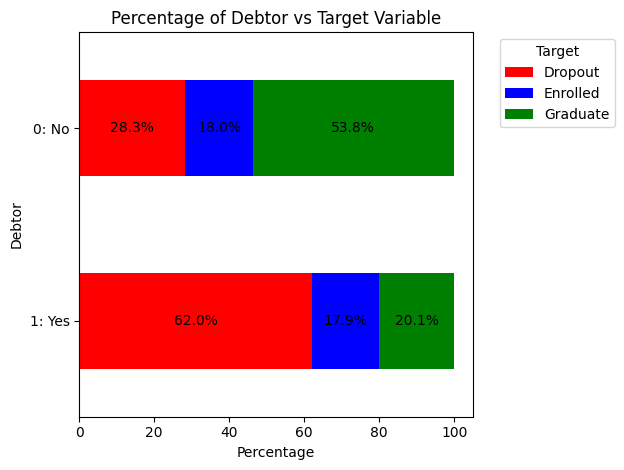

In [46]:
import matplotlib.pyplot as plt

# Function to add value labels
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        plt.text(rect.get_x() + width / 2., rect.get_y() + rect.get_height() / 2.,
                 '%.1f%%' % width, ha='center', va='center', color='black')

# Group by Debtor and Target and count occurrences
Debtor_target_freq = df.groupby(['Debtor', 'Target']).size().unstack(fill_value=0)

# Calculate total count for each Debtor
Debtor_total_count = Debtor_target_freq.sum(axis=1)

# Calculate percentages
Debtor_percentages = Debtor_target_freq.divide(Debtor_total_count, axis=0) * 100

# Plot horizontal bar chart with custom colors
ax = Debtor_percentages.plot(kind='barh', stacked=True, color=['red', 'blue', 'green'])

# Add value labels
for i, (index, row) in enumerate(Debtor_percentages.iterrows()):
    autolabel(ax.patches[i * len(row): (i + 1) * len(row)])

# Customize plot
plt.xlabel('Percentage')
plt.ylabel('Debtor')
plt.title('Percentage of Debtor vs Target Variable')
plt.legend(['Dropout', 'Enrolled', 'Graduate'], title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')

# Change y-axis labels
new_labels = ['0: No', '1: Yes']
plt.yticks(range(len(new_labels)), new_labels)

plt.gca().invert_yaxis()  # Invert y-axis to have No at the top
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [107]:
print(Debtor_target_freq)

Target  Dropout  Enrolled  Graduate
Debtor                             
0          1109       704      2108
1           312        90       101


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


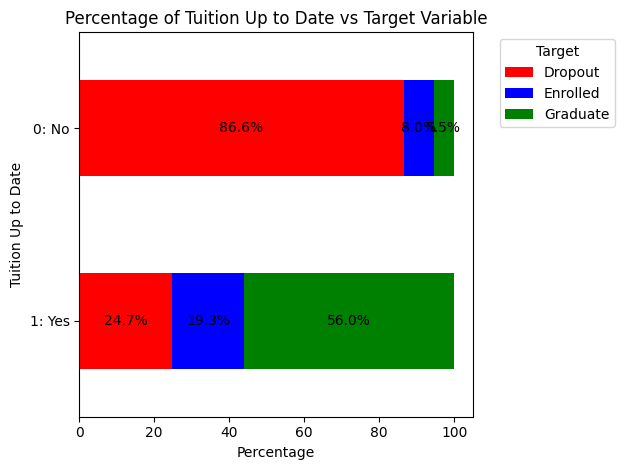

In [49]:
import matplotlib.pyplot as plt

# Function to add value labels
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        plt.text(rect.get_x() + width / 2., rect.get_y() + rect.get_height() / 2.,
                 '%.1f%%' % width, ha='center', va='center', color='black')

# Group by Tuition Fees Up to Date and Target and count occurrences
Tuition_up_to_date_target_freq = df.groupby(['Tuition fees up to date', 'Target']).size().unstack(fill_value=0)

# Calculate total count for each Tuition Up to Date Students
Tuition_up_to_date_total_count = Tuition_up_to_date_target_freq.sum(axis=1)

# Calculate percentages
Tuition_up_to_date_percentages = Tuition_up_to_date_target_freq.divide(Tuition_up_to_date_total_count, axis=0) * 100

# Plot horizontal bar chart with custom colors
ax = Tuition_up_to_date_percentages.plot(kind='barh', stacked=True, color=['red', 'blue', 'green'])

# Add value labels
for i, (index, row) in enumerate(Tuition_up_to_date_percentages.iterrows()):
    autolabel(ax.patches[i * len(row): (i + 1) * len(row)])

# Customize plot
plt.xlabel('Percentage')
plt.ylabel('Tuition Up to Date')
plt.title('Percentage of Tuition Up to Date vs Target Variable')
plt.legend(['Dropout', 'Enrolled', 'Graduate'], title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')

# Change y-axis labels
new_labels = ['0: No', '1: Yes']
plt.yticks(range(len(new_labels)), new_labels)

plt.gca().invert_yaxis()  # Invert y-axis to have No at the top
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [108]:
print(Tuition_up_to_date_target_freq)

Target                   Dropout  Enrolled  Graduate
Tuition fees up to date                             
0                            457        42        29
1                            964       752      2180


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


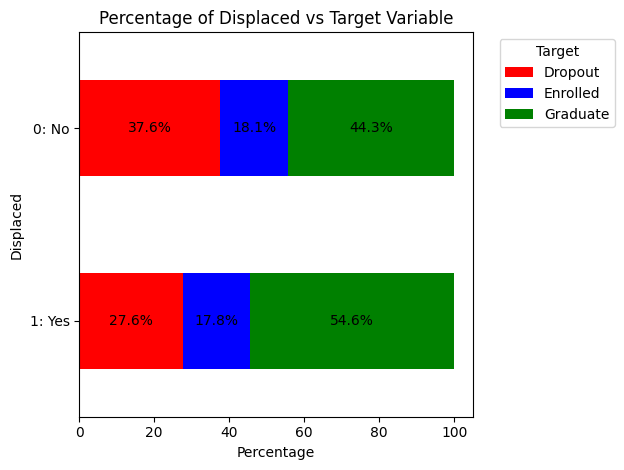

In [48]:
import matplotlib.pyplot as plt

# Function to add value labels
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        plt.text(rect.get_x() + width / 2., rect.get_y() + rect.get_height() / 2.,
                 '%.1f%%' % width, ha='center', va='center', color='black')

# Group by Displaced and Target and count occurrences
Displaced_target_freq = df.groupby(['Displaced', 'Target']).size().unstack(fill_value=0)

# Calculate total count for each Displaced Student
Displaced_total_count = Displaced_target_freq.sum(axis=1)

# Calculate percentages
Displaced_percentages = Displaced_target_freq.divide(Displaced_total_count, axis=0) * 100

# Plot horizontal bar chart with custom colors
ax = Displaced_percentages.plot(kind='barh', stacked=True, color=['red', 'blue', 'green'])

# Add value labels
for i, (index, row) in enumerate(Displaced_percentages.iterrows()):
    autolabel(ax.patches[i * len(row): (i + 1) * len(row)])

# Customize plot
plt.xlabel('Percentage')
plt.ylabel('Displaced')
plt.title('Percentage of Displaced vs Target Variable')
plt.legend(['Dropout', 'Enrolled', 'Graduate'], title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')

# Change y-axis labels
new_labels = ['0: No', '1: Yes']
plt.yticks(range(len(new_labels)), new_labels)

plt.gca().invert_yaxis()  # Invert y-axis to have No at the top
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


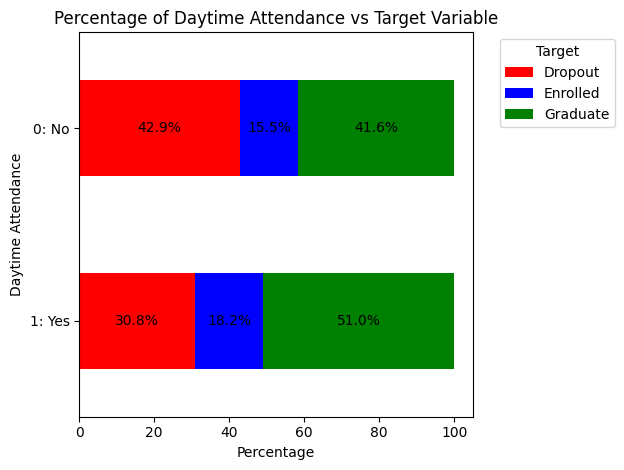

In [50]:
import matplotlib.pyplot as plt

# Function to add value labels
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        plt.text(rect.get_x() + width / 2., rect.get_y() + rect.get_height() / 2.,
                 '%.1f%%' % width, ha='center', va='center', color='black')

# Group by Daytime/evening attendance and Target and count occurrences
Daytime_attendance_target_freq = df.groupby(['Daytime/evening attendance', 'Target']).size().unstack(fill_value=0)

# Calculate total count for each Daytime Students
Daytime_attendance_total_count = Daytime_attendance_target_freq.sum(axis=1)

# Calculate percentages
Daytime_attendance_percentages = Daytime_attendance_target_freq.divide(Daytime_attendance_total_count, axis=0) * 100

# Plot horizontal bar chart with custom colors
ax = Daytime_attendance_percentages.plot(kind='barh', stacked=True, color=['red', 'blue', 'green'])

# Add value labels
for i, (index, row) in enumerate(Daytime_attendance_percentages.iterrows()):
    autolabel(ax.patches[i * len(row): (i + 1) * len(row)])

# Customize plot
plt.xlabel('Percentage')
plt.ylabel('Daytime Attendance')
plt.title('Percentage of Daytime Attendance vs Target Variable')
plt.legend(['Dropout', 'Enrolled', 'Graduate'], title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')

# Change y-axis labels
new_labels = ['0: No', '1: Yes']
plt.yticks(range(len(new_labels)), new_labels)

plt.gca().invert_yaxis()  # Invert y-axis to have No at the top
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


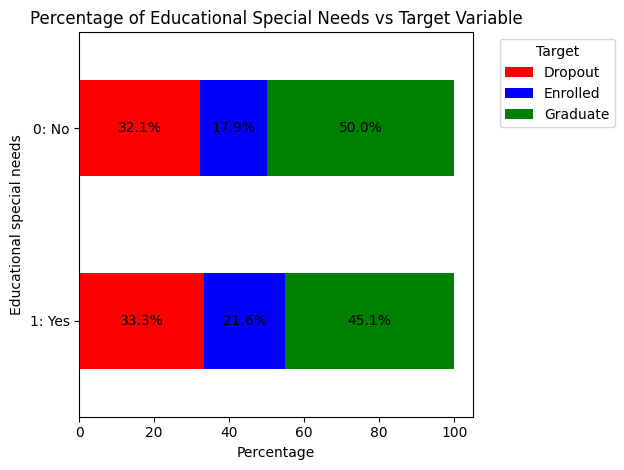

In [51]:
import matplotlib.pyplot as plt

# Function to add value labels
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        plt.text(rect.get_x() + width / 2., rect.get_y() + rect.get_height() / 2.,
                 '%.1f%%' % width, ha='center', va='center', color='black')

# Group by Specials Needs Status and Target and count occurrences
special_needs_target_freq = df.groupby(['Educational special needs', 'Target']).size().unstack(fill_value=0)

# Calculate total count for each Displaced Student
special_needs_total_count = special_needs_target_freq.sum(axis=1)

# Calculate percentages
special_needs_percentages = special_needs_target_freq.divide(special_needs_total_count, axis=0) * 100

# Plot horizontal bar chart with custom colors
ax = special_needs_percentages.plot(kind='barh', stacked=True, color=['red', 'blue', 'green'])

# Add value labels
for i, (index, row) in enumerate(special_needs_percentages.iterrows()):
    autolabel(ax.patches[i * len(row): (i + 1) * len(row)])

# Customize plot
plt.xlabel('Percentage')
plt.ylabel('Educational special needs')
plt.title('Percentage of Educational Special Needs vs Target Variable')
plt.legend(['Dropout', 'Enrolled', 'Graduate'], title='Target', bbox_to_anchor=(1.05, 1), loc='upper left')

# Change y-axis labels
new_labels = ['0: No', '1: Yes']
plt.yticks(range(len(new_labels)), new_labels)

plt.gca().invert_yaxis()  # Invert y-axis to have No at the top
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [52]:
df.columns


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s